# Question 1: Convert covariance matrix into correlation matrix using numpy

1A Answer: Covariance and correlation both show how two factors are related to eachother:  

- **Covariance** tells you if the two factors move together (positive) or in opposite directions (negative). But it doesn’t say how strong the relationship is.  

- **Correlation** is like a cleaner version of covariance. It shows both the direction and the strength of the relationship on a scale from -1 to 1, so it’s easier to understand.  

Custom Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

NumPy Covariance Matrix:
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

Are covariance matrices equal? True

Custom Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

NumPy Correlation Matrix:
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]

Are correlation matrices equal? Tru

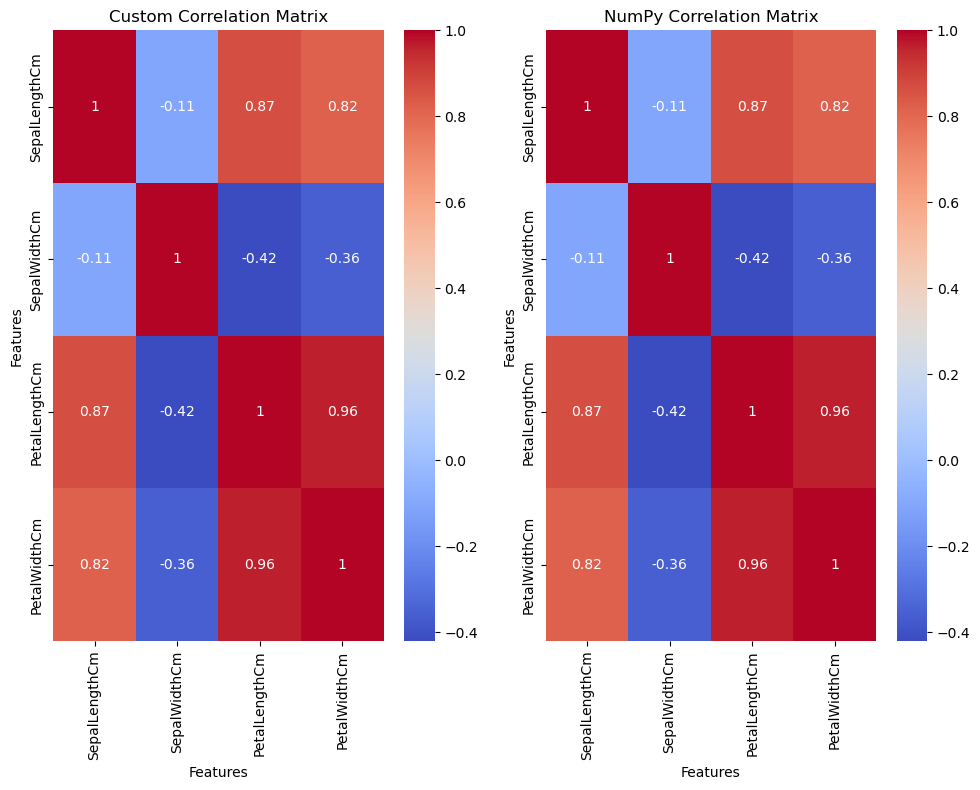

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1B ANSWER: Load the Iris dataset
iris_data = pd.read_csv("Iris.csv")
numerical_features = iris_data.iloc[:, 1:-1]

# 1C-a ANSWER: A function to calculate the covariance between two variables
def calculate_covariance(feature_x, feature_y):
    mean_x = np.mean(feature_x)
    mean_y = np.mean(feature_y)
    covariance = np.sum((feature_x - mean_x) * (feature_y - mean_y)) / (len(feature_x) - 1)
    return covariance

# 1C-b ANSWER: A function to compute the Covariance matrix
def compute_covariance_matrix(data):
    num_features = data.shape[1]
    covariance_matrix = np.zeros((num_features, num_features))
    
    for i in range(num_features):
        for j in range(num_features):
            covariance_matrix[i][j] = calculate_covariance(data.iloc[:, i], data.iloc[:, j])
    
    return covariance_matrix

# 1D ANSWER: Compare the results of your function with NumPy's np.cov
custom_covariance_matrix = compute_covariance_matrix(numerical_features)
numpy_covariance_matrix = np.cov(numerical_features, rowvar=False)

# Print Results
print("Custom Covariance Matrix:")
print(custom_covariance_matrix)

print("\nNumPy Covariance Matrix:")
print(numpy_covariance_matrix)

# Verify if both matrices are equal
print("\nAre covariance matrices equal?", np.allclose(custom_covariance_matrix, numpy_covariance_matrix))

# 1E ANSWER: A function to compute the Correlation matrix
def compute_correlation_matrix(data):
    covariance_matrix = compute_covariance_matrix(data)
    standard_deviations = np.sqrt(np.diag(covariance_matrix))
    
    num_features = data.shape[1]
    correlation_matrix = np.zeros((num_features, num_features))
    
    for i in range(num_features):
        for j in range(num_features):
            correlation_matrix[i][j] = covariance_matrix[i][j] / (standard_deviations[i] * standard_deviations[j])
    
    return correlation_matrix

# 1F ANSWER: Test2: Validate the correlation matrix implementation
custom_correlation_matrix = compute_correlation_matrix(numerical_features)
numpy_correlation_matrix = np.corrcoef(numerical_features, rowvar=False)

# Print Results
print("\nCustom Correlation Matrix:")
print(custom_correlation_matrix)

print("\nNumPy Correlation Matrix:")
print(numpy_correlation_matrix)

# Verify if both matrices are equal
print("\nAre correlation matrices equal?", np.allclose(custom_correlation_matrix, numpy_correlation_matrix))

# 1G ANSWER: Visualization to communicate the results
plt.figure(figsize=(10, 8))

# Heatmap for custom correlation matrix
plt.subplot(1, 2, 1)
sns.heatmap(custom_correlation_matrix, annot=True, cmap="coolwarm", xticklabels=numerical_features.columns, yticklabels=numerical_features.columns)
plt.title("Custom Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

# Heatmap for NumPy correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(numpy_correlation_matrix, annot=True, cmap="coolwarm", xticklabels=numerical_features.columns, yticklabels=numerical_features.columns)
plt.title("NumPy Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

plt.tight_layout()
plt.show()


# Question 2: Laptop Price Dataset Analysis